In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from datetime import datetime


from scipy import stats as st

In [2]:
pd.set_option('display.max_row', 100)
pd.set_option('display.max_column',100 )

data = pd.read_excel(r'E:\LENOVODOC\ISMD23\Module Projet\Dataset_scoring13082022.xlsx')

In [3]:
 (data.isna().sum()/data.shape[0]).sort_values(ascending=True)

DIRECTION                  0.000000
NCG                        0.000000
CPTVUE                     0.000000
TYPEPRÊT                   0.000000
STATUTPRÊT                 0.000000
DATOPER                    0.000000
INTDIF                     0.000000
PERRMB                     0.000000
MODRMB                     0.000000
DEBLOCAGE                  0.000000
PREMIER_RMB                0.000000
DERNRMB                    0.000000
DATFIN                     0.000000
CATEGORIE                  0.000000
ENCOURS                    0.000000
NB_ECHEANCE                0.000000
NB_ECHEANCE_REGLE          0.000000
ECHEANCE                   0.000000
DECOUVERTS                 0.000000
DEPOT_A_TERME              0.000000
DEPOTS_DE_GARANTIE         0.000000
CREANCES_DOUTEUSES         0.000000
PROVISIONS                 0.000000
CARTE_BANCAIRE             0.000000
CHEQUIER                   0.000000
INTERNET_BANKING           0.000000
SMS_BANKING                0.000000
PERIODICITE                0

In [4]:
(data.isna().sum()).sort_values(ascending=True)

DIRECTION                       0
NCG                             0
CPTVUE                          0
TYPEPRÊT                        0
STATUTPRÊT                      0
DATOPER                         0
INTDIF                          0
PERRMB                          0
MODRMB                          0
DEBLOCAGE                       0
PREMIER_RMB                     0
DERNRMB                         0
DATFIN                          0
CATEGORIE                       0
ENCOURS                         0
NB_ECHEANCE                     0
NB_ECHEANCE_REGLE               0
ECHEANCE                        0
DECOUVERTS                      0
DEPOT_A_TERME                   0
DEPOTS_DE_GARANTIE              0
CREANCES_DOUTEUSES              0
PROVISIONS                      0
CARTE_BANCAIRE                  0
CHEQUIER                        0
INTERNET_BANKING                0
SMS_BANKING                     0
PERIODICITE                     0
INTERDITDECHEQUIER              0
MNTPRT        

In [5]:
data.shape

(126611, 87)

In [6]:
df = data[data.columns[data.isna().sum()/data.shape[0] <0.7]]
df.head()

,DIRECTION,BRANCHE,AGENCE,NOOPER,FONDSDECOMMERCE,CLIENT,TypeCNI,EMPLOYEUR,TYPE_CLIENT,Professsion,SECTEUR_ACTIVITE,Ancienneté,DATOUV,SITUATIONMATRIMONIALE,SEGMENT,DATENAISSANCE,SEXE,NATIONALITE,PAYSRESIDENCE,OPERATEURTELEPHONIQUE,TELEPHONE,SALAIRE,COMMUNE_NAISSANCE,LIEURESIDENCE,INTERDITDECHEQUIER,CATEGORIE,NCG,CPTVUE,NBCREDIT,NBDEBIT,SOLDEMOYEN,TYPEPRÊT,STATUTPRÊT,DATOPER,MNTPRT,INTDIF,PERRMB,MODRMB,TEG,DEBLOCAGE,PREMIER_RMB,DERNRMB,DATFIN,ENCOURS,PERIODICITE,DUREE_MOIS,AUTORISATIONDECOUVERT,NB_ECHEANCE,NB_ECHEANCE_REGLE,ECHEANCE,RACHAT,DECOUVERTS,DEPOT_A_TERME,DEPOTS_DE_GARANTIE,CREANCES_DOUTEUSES,PROVISIONS,DATENAISSANCE.1,CARTE_BANCAIRE,CHEQUIER,INTERNET_BANKING,SMS_BANKING,MOIS01,MOIS02,MOIS03,MOIS04,MOIS05,MOIS06,MOIS07,MOIS08,MOIS09,MOIS10,MOIS11,MOIS12,AGE,NOTE
0,DCPR,SUD EST OUEST,DABOU,3783554,FDC INTER PLUS / DABOU / SEO,20314,Carte nationale d'identite,DRH,PARTICULIERS,RETRAITE,Services non marchands,19,08/09/2003,CELIBATAIRE,INTERMEDIAIRES,16/06/1962,M,COTE D'IVOIRE,COTE D'IVOIRE,ORANGE,0707027538,0.0,BOCANDA,NaN,N,PARTICULIERS,251114,203140047,11.0,0.0,566954.181818,CRD CT CONSO. AV. DAT,V,16/06/2010,700000,N,M,P,0.0,16/06/2010,25/08/2010,70000,2011-05-25,0,M,10.0,NaN,10,10,70000,NaN,0,0,0,0,0,16/06/1962,1,1,0,0,0.0,0.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,60.079452,SAINS
1,DCPR,SUD EST OUEST,DABOU,1001176,FDC INTER PLUS / DABOU / SEO,20314,Carte nationale d'identite,DRH,PARTICULIERS,RETRAITE,Services non marchands,19,08/09/2003,CELIBATAIRE,INTERMEDIAIRES,16/06/1962,M,COTE D'IVOIRE,COTE D'IVOIRE,ORANGE,0707027538,0.0,BOCANDA,NaN,N,PARTICULIERS,251114,203140047,NaN,NaN,NaN,CRD CT CONSO. AV. DAT,V,11/10/2003,500000,N,M,P,0.0,31/07/2003,31/08/2003,50000,2004-05-31,0,M,10.0,NaN,10,10,50000,NaN,0,0,0,0,0,16/06/1962,1,1,0,0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,0.0,0.0,0.0,0.0,60.079452,SAINS
2,DCPR,SUD EST OUEST,DABOU,1513150,FDC INTER PLUS / DABOU / SEO,20314,Carte nationale d'identite,DRH,PARTICULIERS,RETRAITE,Services non marchands,19,08/09/2003,CELIBATAIRE,INTERMEDIAIRES,16/06/1962,M,COTE D'IVOIRE,COTE D'IVOIRE,ORANGE,0707027538,0.0,BOCANDA,NaN,N,PARTICULIERS,251114,203140047,4.0,2.0,46226.750000,CRD CT CONSO. AV. DAT,V,07/09/2006,1000000,N,M,P,0.0,31/08/2006,30/09/2006,100000,2007-06-30,0,M,10.0,NaN,10,10,100000,NaN,0,0,0,0,0,16/06/1962,1,1,0,0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,0.0,0.0,60.079452,SAINS
3,DCPR,SUD EST OUEST,DABOU,1324716,FDC INTER PLUS / DABOU / SEO,20314,Carte nationale d'identite,DRH,PARTICULIERS,RETRAITE,Services non marchands,19,08/09/2003,CELIBATAIRE,INTERMEDIAIRES,16/06/1962,M,COTE D'IVOIRE,COTE D'IVOIRE,ORANGE,0707027538,0.0,BOCANDA,NaN,N,PARTICULIERS,251114,203140047,NaN,NaN,NaN,CRD CT CONSO. AV. DAT,V,19/09/2005,1000000,N,M,P,0.0,11/08/2005,30/09/2005,100000,2006-06-30,0,M,10.0,NaN,10,10,100000,NaN,0,0,0,0,0,16/06/1962,1,1,0,0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,0.0,0.0,60.079452,SAINS
4,DCPR,SUD EST OUEST,DABOU,P360754,FDC INTER PLUS / DABOU / SEO,20314,Carte nationale d'identite,DRH,PARTICULIERS,RETRAITE,Services non marchands,19,08/09/2003,CELIBATAIRE,INTERMEDIAIRES,16/06/1962,M,COTE D'IVOIRE,COTE D'IVOIRE,ORANGE,0707027538,0.0,BOCANDA,NaN,N,PARTICULIERS,251114,203140047,10.0,1.0,857501.636364,CRD CT CONSO. AV. DAT,V,23/06/2016,1000000,N,M,P,NaN,23/06/2016,25/08/2016,100000,2017-05-25,0,M,10.0,NaN,10,10,100000,NaN,0,0,0,0,0,16/06/1962,1,1,0,0,0.0,0.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,60.079452,SAINS


In [7]:
df.shape

(126611, 75)

In [8]:
del df['AGE']

In [9]:
df.head()

,DIRECTION,BRANCHE,AGENCE,NOOPER,FONDSDECOMMERCE,CLIENT,TypeCNI,EMPLOYEUR,TYPE_CLIENT,Professsion,SECTEUR_ACTIVITE,Ancienneté,DATOUV,SITUATIONMATRIMONIALE,SEGMENT,DATENAISSANCE,SEXE,NATIONALITE,PAYSRESIDENCE,OPERATEURTELEPHONIQUE,TELEPHONE,SALAIRE,COMMUNE_NAISSANCE,LIEURESIDENCE,INTERDITDECHEQUIER,CATEGORIE,NCG,CPTVUE,NBCREDIT,NBDEBIT,SOLDEMOYEN,TYPEPRÊT,STATUTPRÊT,DATOPER,MNTPRT,INTDIF,PERRMB,MODRMB,TEG,DEBLOCAGE,PREMIER_RMB,DERNRMB,DATFIN,ENCOURS,PERIODICITE,DUREE_MOIS,AUTORISATIONDECOUVERT,NB_ECHEANCE,NB_ECHEANCE_REGLE,ECHEANCE,RACHAT,DECOUVERTS,DEPOT_A_TERME,DEPOTS_DE_GARANTIE,CREANCES_DOUTEUSES,PROVISIONS,DATENAISSANCE.1,CARTE_BANCAIRE,CHEQUIER,INTERNET_BANKING,SMS_BANKING,MOIS01,MOIS02,MOIS03,MOIS04,MOIS05,MOIS06,MOIS07,MOIS08,MOIS09,MOIS10,MOIS11,MOIS12,NOTE
0,DCPR,SUD EST OUEST,DABOU,3783554,FDC INTER PLUS / DABOU / SEO,20314,Carte nationale d'identite,DRH,PARTICULIERS,RETRAITE,Services non marchands,19,08/09/2003,CELIBATAIRE,INTERMEDIAIRES,16/06/1962,M,COTE D'IVOIRE,COTE D'IVOIRE,ORANGE,0707027538,0.0,BOCANDA,NaN,N,PARTICULIERS,251114,203140047,11.0,0.0,566954.181818,CRD CT CONSO. AV. DAT,V,16/06/2010,700000,N,M,P,0.0,16/06/2010,25/08/2010,70000,2011-05-25,0,M,10.0,NaN,10,10,70000,NaN,0,0,0,0,0,16/06/1962,1,1,0,0,0.0,0.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,SAINS
1,DCPR,SUD EST OUEST,DABOU,1001176,FDC INTER PLUS / DABOU / SEO,20314,Carte nationale d'identite,DRH,PARTICULIERS,RETRAITE,Services non marchands,19,08/09/2003,CELIBATAIRE,INTERMEDIAIRES,16/06/1962,M,COTE D'IVOIRE,COTE D'IVOIRE,ORANGE,0707027538,0.0,BOCANDA,NaN,N,PARTICULIERS,251114,203140047,NaN,NaN,NaN,CRD CT CONSO. AV. DAT,V,11/10/2003,500000,N,M,P,0.0,31/07/2003,31/08/2003,50000,2004-05-31,0,M,10.0,NaN,10,10,50000,NaN,0,0,0,0,0,16/06/1962,1,1,0,0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,0.0,0.0,0.0,0.0,SAINS
2,DCPR,SUD EST OUEST,DABOU,1513150,FDC INTER PLUS / DABOU / SEO,20314,Carte nationale d'identite,DRH,PARTICULIERS,RETRAITE,Services non marchands,19,08/09/2003,CELIBATAIRE,INTERMEDIAIRES,16/06/1962,M,COTE D'IVOIRE,COTE D'IVOIRE,ORANGE,0707027538,0.0,BOCANDA,NaN,N,PARTICULIERS,251114,203140047,4.0,2.0,46226.750000,CRD CT CONSO. AV. DAT,V,07/09/2006,1000000,N,M,P,0.0,31/08/2006,30/09/2006,100000,2007-06-30,0,M,10.0,NaN,10,10,100000,NaN,0,0,0,0,0,16/06/1962,1,1,0,0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,0.0,0.0,SAINS
3,DCPR,SUD EST OUEST,DABOU,1324716,FDC INTER PLUS / DABOU / SEO,20314,Carte nationale d'identite,DRH,PARTICULIERS,RETRAITE,Services non marchands,19,08/09/2003,CELIBATAIRE,INTERMEDIAIRES,16/06/1962,M,COTE D'IVOIRE,COTE D'IVOIRE,ORANGE,0707027538,0.0,BOCANDA,NaN,N,PARTICULIERS,251114,203140047,NaN,NaN,NaN,CRD CT CONSO. AV. DAT,V,19/09/2005,1000000,N,M,P,0.0,11/08/2005,30/09/2005,100000,2006-06-30,0,M,10.0,NaN,10,10,100000,NaN,0,0,0,0,0,16/06/1962,1,1,0,0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,0.0,0.0,SAINS
4,DCPR,SUD EST OUEST,DABOU,P360754,FDC INTER PLUS / DABOU / SEO,20314,Carte nationale d'identite,DRH,PARTICULIERS,RETRAITE,Services non marchands,19,08/09/2003,CELIBATAIRE,INTERMEDIAIRES,16/06/1962,M,COTE D'IVOIRE,COTE D'IVOIRE,ORANGE,0707027538,0.0,BOCANDA,NaN,N,PARTICULIERS,251114,203140047,10.0,1.0,857501.636364,CRD CT CONSO. AV. DAT,V,23/06/2016,1000000,N,M,P,NaN,23/06/2016,25/08/2016,100000,2017-05-25,0,M,10.0,NaN,10,10,100000,NaN,0,0,0,0,0,16/06/1962,1,1,0,0,0.0,0.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,SAINS


In [10]:
def calculateAge(birthDate):
    today = date.today()
    age = today.year - birthDate.year -((today.month, today.day) <(birthDate.month, birthDate.day))
    return age

In [11]:
df['DATENAISSANCE'] =  pd.to_datetime(df['DATENAISSANCE'], infer_datetime_format=True)

<ipython-input-11-1a0721fbb87a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DATENAISSANCE'] =  pd.to_datetime(df['DATENAISSANCE'], infer_datetime_format=True)


In [12]:
df['DATENAISSANCE']=df['DATENAISSANCE'].apply(lambda x: calculateAge(x))

<ipython-input-12-89981e806103>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DATENAISSANCE']=df['DATENAISSANCE'].apply(lambda x: calculateAge(x))


In [13]:
df.head()

,DIRECTION,BRANCHE,AGENCE,NOOPER,FONDSDECOMMERCE,CLIENT,TypeCNI,EMPLOYEUR,TYPE_CLIENT,Professsion,SECTEUR_ACTIVITE,Ancienneté,DATOUV,SITUATIONMATRIMONIALE,SEGMENT,DATENAISSANCE,SEXE,NATIONALITE,PAYSRESIDENCE,OPERATEURTELEPHONIQUE,TELEPHONE,SALAIRE,COMMUNE_NAISSANCE,LIEURESIDENCE,INTERDITDECHEQUIER,CATEGORIE,NCG,CPTVUE,NBCREDIT,NBDEBIT,SOLDEMOYEN,TYPEPRÊT,STATUTPRÊT,DATOPER,MNTPRT,INTDIF,PERRMB,MODRMB,TEG,DEBLOCAGE,PREMIER_RMB,DERNRMB,DATFIN,ENCOURS,PERIODICITE,DUREE_MOIS,AUTORISATIONDECOUVERT,NB_ECHEANCE,NB_ECHEANCE_REGLE,ECHEANCE,RACHAT,DECOUVERTS,DEPOT_A_TERME,DEPOTS_DE_GARANTIE,CREANCES_DOUTEUSES,PROVISIONS,DATENAISSANCE.1,CARTE_BANCAIRE,CHEQUIER,INTERNET_BANKING,SMS_BANKING,MOIS01,MOIS02,MOIS03,MOIS04,MOIS05,MOIS06,MOIS07,MOIS08,MOIS09,MOIS10,MOIS11,MOIS12,NOTE
0,DCPR,SUD EST OUEST,DABOU,3783554,FDC INTER PLUS / DABOU / SEO,20314,Carte nationale d'identite,DRH,PARTICULIERS,RETRAITE,Services non marchands,19,08/09/2003,CELIBATAIRE,INTERMEDIAIRES,60.0,M,COTE D'IVOIRE,COTE D'IVOIRE,ORANGE,0707027538,0.0,BOCANDA,NaN,N,PARTICULIERS,251114,203140047,11.0,0.0,566954.181818,CRD CT CONSO. AV. DAT,V,16/06/2010,700000,N,M,P,0.0,16/06/2010,25/08/2010,70000,2011-05-25,0,M,10.0,NaN,10,10,70000,NaN,0,0,0,0,0,16/06/1962,1,1,0,0,0.0,0.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,SAINS
1,DCPR,SUD EST OUEST,DABOU,1001176,FDC INTER PLUS / DABOU / SEO,20314,Carte nationale d'identite,DRH,PARTICULIERS,RETRAITE,Services non marchands,19,08/09/2003,CELIBATAIRE,INTERMEDIAIRES,60.0,M,COTE D'IVOIRE,COTE D'IVOIRE,ORANGE,0707027538,0.0,BOCANDA,NaN,N,PARTICULIERS,251114,203140047,NaN,NaN,NaN,CRD CT CONSO. AV. DAT,V,11/10/2003,500000,N,M,P,0.0,31/07/2003,31/08/2003,50000,2004-05-31,0,M,10.0,NaN,10,10,50000,NaN,0,0,0,0,0,16/06/1962,1,1,0,0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,0.0,0.0,0.0,0.0,SAINS
2,DCPR,SUD EST OUEST,DABOU,1513150,FDC INTER PLUS / DABOU / SEO,20314,Carte nationale d'identite,DRH,PARTICULIERS,RETRAITE,Services non marchands,19,08/09/2003,CELIBATAIRE,INTERMEDIAIRES,60.0,M,COTE D'IVOIRE,COTE D'IVOIRE,ORANGE,0707027538,0.0,BOCANDA,NaN,N,PARTICULIERS,251114,203140047,4.0,2.0,46226.750000,CRD CT CONSO. AV. DAT,V,07/09/2006,1000000,N,M,P,0.0,31/08/2006,30/09/2006,100000,2007-06-30,0,M,10.0,NaN,10,10,100000,NaN,0,0,0,0,0,16/06/1962,1,1,0,0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,0.0,0.0,SAINS
3,DCPR,SUD EST OUEST,DABOU,1324716,FDC INTER PLUS / DABOU / SEO,20314,Carte nationale d'identite,DRH,PARTICULIERS,RETRAITE,Services non marchands,19,08/09/2003,CELIBATAIRE,INTERMEDIAIRES,60.0,M,COTE D'IVOIRE,COTE D'IVOIRE,ORANGE,0707027538,0.0,BOCANDA,NaN,N,PARTICULIERS,251114,203140047,NaN,NaN,NaN,CRD CT CONSO. AV. DAT,V,19/09/2005,1000000,N,M,P,0.0,11/08/2005,30/09/2005,100000,2006-06-30,0,M,10.0,NaN,10,10,100000,NaN,0,0,0,0,0,16/06/1962,1,1,0,0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,0.0,0.0,SAINS
4,DCPR,SUD EST OUEST,DABOU,P360754,FDC INTER PLUS / DABOU / SEO,20314,Carte nationale d'identite,DRH,PARTICULIERS,RETRAITE,Services non marchands,19,08/09/2003,CELIBATAIRE,INTERMEDIAIRES,60.0,M,COTE D'IVOIRE,COTE D'IVOIRE,ORANGE,0707027538,0.0,BOCANDA,NaN,N,PARTICULIERS,251114,203140047,10.0,1.0,857501.636364,CRD CT CONSO. AV. DAT,V,23/06/2016,1000000,N,M,P,NaN,23/06/2016,25/08/2016,100000,2017-05-25,0,M,10.0,NaN,10,10,100000,NaN,0,0,0,0,0,16/06/1962,1,1,0,0,0.0,0.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,SAINS


In [14]:
df.rename(columns={'DATENAISSANCE': 'AGE'}, inplace=True)

C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [15]:
df.head()

,DIRECTION,BRANCHE,AGENCE,NOOPER,FONDSDECOMMERCE,CLIENT,TypeCNI,EMPLOYEUR,TYPE_CLIENT,Professsion,SECTEUR_ACTIVITE,Ancienneté,DATOUV,SITUATIONMATRIMONIALE,SEGMENT,AGE,SEXE,NATIONALITE,PAYSRESIDENCE,OPERATEURTELEPHONIQUE,TELEPHONE,SALAIRE,COMMUNE_NAISSANCE,LIEURESIDENCE,INTERDITDECHEQUIER,CATEGORIE,NCG,CPTVUE,NBCREDIT,NBDEBIT,SOLDEMOYEN,TYPEPRÊT,STATUTPRÊT,DATOPER,MNTPRT,INTDIF,PERRMB,MODRMB,TEG,DEBLOCAGE,PREMIER_RMB,DERNRMB,DATFIN,ENCOURS,PERIODICITE,DUREE_MOIS,AUTORISATIONDECOUVERT,NB_ECHEANCE,NB_ECHEANCE_REGLE,ECHEANCE,RACHAT,DECOUVERTS,DEPOT_A_TERME,DEPOTS_DE_GARANTIE,CREANCES_DOUTEUSES,PROVISIONS,DATENAISSANCE.1,CARTE_BANCAIRE,CHEQUIER,INTERNET_BANKING,SMS_BANKING,MOIS01,MOIS02,MOIS03,MOIS04,MOIS05,MOIS06,MOIS07,MOIS08,MOIS09,MOIS10,MOIS11,MOIS12,NOTE
0,DCPR,SUD EST OUEST,DABOU,3783554,FDC INTER PLUS / DABOU / SEO,20314,Carte nationale d'identite,DRH,PARTICULIERS,RETRAITE,Services non marchands,19,08/09/2003,CELIBATAIRE,INTERMEDIAIRES,60.0,M,COTE D'IVOIRE,COTE D'IVOIRE,ORANGE,0707027538,0.0,BOCANDA,NaN,N,PARTICULIERS,251114,203140047,11.0,0.0,566954.181818,CRD CT CONSO. AV. DAT,V,16/06/2010,700000,N,M,P,0.0,16/06/2010,25/08/2010,70000,2011-05-25,0,M,10.0,NaN,10,10,70000,NaN,0,0,0,0,0,16/06/1962,1,1,0,0,0.0,0.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,SAINS
1,DCPR,SUD EST OUEST,DABOU,1001176,FDC INTER PLUS / DABOU / SEO,20314,Carte nationale d'identite,DRH,PARTICULIERS,RETRAITE,Services non marchands,19,08/09/2003,CELIBATAIRE,INTERMEDIAIRES,60.0,M,COTE D'IVOIRE,COTE D'IVOIRE,ORANGE,0707027538,0.0,BOCANDA,NaN,N,PARTICULIERS,251114,203140047,NaN,NaN,NaN,CRD CT CONSO. AV. DAT,V,11/10/2003,500000,N,M,P,0.0,31/07/2003,31/08/2003,50000,2004-05-31,0,M,10.0,NaN,10,10,50000,NaN,0,0,0,0,0,16/06/1962,1,1,0,0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,0.0,0.0,0.0,0.0,SAINS
2,DCPR,SUD EST OUEST,DABOU,1513150,FDC INTER PLUS / DABOU / SEO,20314,Carte nationale d'identite,DRH,PARTICULIERS,RETRAITE,Services non marchands,19,08/09/2003,CELIBATAIRE,INTERMEDIAIRES,60.0,M,COTE D'IVOIRE,COTE D'IVOIRE,ORANGE,0707027538,0.0,BOCANDA,NaN,N,PARTICULIERS,251114,203140047,4.0,2.0,46226.750000,CRD CT CONSO. AV. DAT,V,07/09/2006,1000000,N,M,P,0.0,31/08/2006,30/09/2006,100000,2007-06-30,0,M,10.0,NaN,10,10,100000,NaN,0,0,0,0,0,16/06/1962,1,1,0,0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,0.0,0.0,SAINS
3,DCPR,SUD EST OUEST,DABOU,1324716,FDC INTER PLUS / DABOU / SEO,20314,Carte nationale d'identite,DRH,PARTICULIERS,RETRAITE,Services non marchands,19,08/09/2003,CELIBATAIRE,INTERMEDIAIRES,60.0,M,COTE D'IVOIRE,COTE D'IVOIRE,ORANGE,0707027538,0.0,BOCANDA,NaN,N,PARTICULIERS,251114,203140047,NaN,NaN,NaN,CRD CT CONSO. AV. DAT,V,19/09/2005,1000000,N,M,P,0.0,11/08/2005,30/09/2005,100000,2006-06-30,0,M,10.0,NaN,10,10,100000,NaN,0,0,0,0,0,16/06/1962,1,1,0,0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,0.0,0.0,SAINS
4,DCPR,SUD EST OUEST,DABOU,P360754,FDC INTER PLUS / DABOU / SEO,20314,Carte nationale d'identite,DRH,PARTICULIERS,RETRAITE,Services non marchands,19,08/09/2003,CELIBATAIRE,INTERMEDIAIRES,60.0,M,COTE D'IVOIRE,COTE D'IVOIRE,ORANGE,0707027538,0.0,BOCANDA,NaN,N,PARTICULIERS,251114,203140047,10.0,1.0,857501.636364,CRD CT CONSO. AV. DAT,V,23/06/2016,1000000,N,M,P,NaN,23/06/2016,25/08/2016,100000,2017-05-25,0,M,10.0,NaN,10,10,100000,NaN,0,0,0,0,0,16/06/1962,1,1,0,0,0.0,0.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,SAINS


In [17]:
df['AGE'] = pd.cut(df['AGE'], bins=np.arange(0,100,15))

<ipython-input-17-62b5af3f6783>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AGE'] = pd.cut(df['AGE'], bins=np.arange(0,100,15))


In [18]:
df['AGE'].shape

(126611,)

In [62]:
test = pd.DataFrame({'days': [0,31,45]})
test['range'] = pd.cut(test.days, [0,30,60])


In [20]:
df.head()

,DIRECTION,BRANCHE,AGENCE,NOOPER,FONDSDECOMMERCE,CLIENT,TypeCNI,EMPLOYEUR,TYPE_CLIENT,Professsion,SECTEUR_ACTIVITE,Ancienneté,DATOUV,SITUATIONMATRIMONIALE,SEGMENT,AGE,SEXE,NATIONALITE,PAYSRESIDENCE,OPERATEURTELEPHONIQUE,TELEPHONE,SALAIRE,COMMUNE_NAISSANCE,LIEURESIDENCE,INTERDITDECHEQUIER,CATEGORIE,NCG,CPTVUE,NBCREDIT,NBDEBIT,SOLDEMOYEN,TYPEPRÊT,STATUTPRÊT,DATOPER,MNTPRT,INTDIF,PERRMB,MODRMB,TEG,DEBLOCAGE,PREMIER_RMB,DERNRMB,DATFIN,ENCOURS,PERIODICITE,DUREE_MOIS,AUTORISATIONDECOUVERT,NB_ECHEANCE,NB_ECHEANCE_REGLE,ECHEANCE,RACHAT,DECOUVERTS,DEPOT_A_TERME,DEPOTS_DE_GARANTIE,CREANCES_DOUTEUSES,PROVISIONS,DATENAISSANCE.1,CARTE_BANCAIRE,CHEQUIER,INTERNET_BANKING,SMS_BANKING,MOIS01,MOIS02,MOIS03,MOIS04,MOIS05,MOIS06,MOIS07,MOIS08,MOIS09,MOIS10,MOIS11,MOIS12,NOTE
0,DCPR,SUD EST OUEST,DABOU,3783554,FDC INTER PLUS / DABOU / SEO,20314,Carte nationale d'identite,DRH,PARTICULIERS,RETRAITE,Services non marchands,19,08/09/2003,CELIBATAIRE,INTERMEDIAIRES,"(45, 60]",M,COTE D'IVOIRE,COTE D'IVOIRE,ORANGE,0707027538,0.0,BOCANDA,NaN,N,PARTICULIERS,251114,203140047,11.0,0.0,566954.181818,CRD CT CONSO. AV. DAT,V,16/06/2010,700000,N,M,P,0.0,16/06/2010,25/08/2010,70000,2011-05-25,0,M,10.0,NaN,10,10,70000,NaN,0,0,0,0,0,16/06/1962,1,1,0,0,0.0,0.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,SAINS
1,DCPR,SUD EST OUEST,DABOU,1001176,FDC INTER PLUS / DABOU / SEO,20314,Carte nationale d'identite,DRH,PARTICULIERS,RETRAITE,Services non marchands,19,08/09/2003,CELIBATAIRE,INTERMEDIAIRES,"(45, 60]",M,COTE D'IVOIRE,COTE D'IVOIRE,ORANGE,0707027538,0.0,BOCANDA,NaN,N,PARTICULIERS,251114,203140047,NaN,NaN,NaN,CRD CT CONSO. AV. DAT,V,11/10/2003,500000,N,M,P,0.0,31/07/2003,31/08/2003,50000,2004-05-31,0,M,10.0,NaN,10,10,50000,NaN,0,0,0,0,0,16/06/1962,1,1,0,0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,0.0,0.0,0.0,0.0,SAINS
2,DCPR,SUD EST OUEST,DABOU,1513150,FDC INTER PLUS / DABOU / SEO,20314,Carte nationale d'identite,DRH,PARTICULIERS,RETRAITE,Services non marchands,19,08/09/2003,CELIBATAIRE,INTERMEDIAIRES,"(45, 60]",M,COTE D'IVOIRE,COTE D'IVOIRE,ORANGE,0707027538,0.0,BOCANDA,NaN,N,PARTICULIERS,251114,203140047,4.0,2.0,46226.750000,CRD CT CONSO. AV. DAT,V,07/09/2006,1000000,N,M,P,0.0,31/08/2006,30/09/2006,100000,2007-06-30,0,M,10.0,NaN,10,10,100000,NaN,0,0,0,0,0,16/06/1962,1,1,0,0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,0.0,0.0,SAINS
3,DCPR,SUD EST OUEST,DABOU,1324716,FDC INTER PLUS / DABOU / SEO,20314,Carte nationale d'identite,DRH,PARTICULIERS,RETRAITE,Services non marchands,19,08/09/2003,CELIBATAIRE,INTERMEDIAIRES,"(45, 60]",M,COTE D'IVOIRE,COTE D'IVOIRE,ORANGE,0707027538,0.0,BOCANDA,NaN,N,PARTICULIERS,251114,203140047,NaN,NaN,NaN,CRD CT CONSO. AV. DAT,V,19/09/2005,1000000,N,M,P,0.0,11/08/2005,30/09/2005,100000,2006-06-30,0,M,10.0,NaN,10,10,100000,NaN,0,0,0,0,0,16/06/1962,1,1,0,0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,0.0,0.0,SAINS
4,DCPR,SUD EST OUEST,DABOU,P360754,FDC INTER PLUS / DABOU / SEO,20314,Carte nationale d'identite,DRH,PARTICULIERS,RETRAITE,Services non marchands,19,08/09/2003,CELIBATAIRE,INTERMEDIAIRES,"(45, 60]",M,COTE D'IVOIRE,COTE D'IVOIRE,ORANGE,0707027538,0.0,BOCANDA,NaN,N,PARTICULIERS,251114,203140047,10.0,1.0,857501.636364,CRD CT CONSO. AV. DAT,V,23/06/2016,1000000,N,M,P,NaN,23/06/2016,25/08/2016,100000,2017-05-25,0,M,10.0,NaN,10,10,100000,NaN,0,0,0,0,0,16/06/1962,1,1,0,0,0.0,0.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,SAINS


In [145]:
freq_AGE= df.groupby(df.Age_Interval).count()

In [146]:
print(freq_AGE)

              DIRECTION  BRANCHE  AGENCE  NOOPER  FONDSDECOMMERCE  CLIENT  \
Age_Interval                                                                
(0, 10]               1        1       1       1                1       1   
(10, 20]             20       20      20      20               20      20   
(20, 30]           1325     1325    1325    1325             1325    1325   
(30, 40]          29827    29827   29827   29827            29827   29827   
(40, 50]          53729    53729   53729   53729            53729   53729   
(50, 60]          25628    25628   25628   25628            25628   25628   
(60, 70]          14208    14208   14208   14208            14207   14208   
(70, 80]           1555     1555    1555    1555             1555    1555   
(80, 90]            158      158     158     158              158     158   
(90, 100]            22       22      22      22               22      22   

              TypeCNI  EMPLOYEUR  TYPE_CLIENT  Professsion  SECTEUR_ACTIVIT

In [21]:
pd.crosstab(df.AGE, df.NOTE, normalize='index')


NOTE,MALSAINS,SAINS
AGE,,
"(0, 15]",0.117647,0.882353
"(15, 30]",0.137698,0.862302
"(30, 45]",0.093784,0.906216
"(45, 60]",0.084799,0.915201
"(60, 75]",0.059758,0.940242
"(75, 90]",0.066802,0.933198


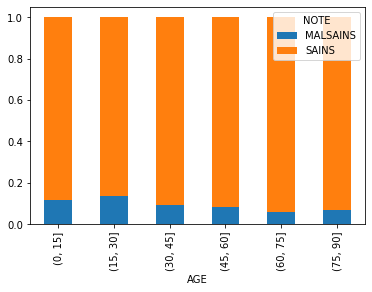

In [23]:
ax = pd.crosstab(df.AGE, df.NOTE, normalize='index').plot.bar(stacked=True)

In [31]:

df['DUREE_MOIS'] 

0          (5, 10]
1          (5, 10]
2          (5, 10]
3          (5, 10]
4          (5, 10]
            ...   
126606    (10, 15]
126607    (10, 15]
126608     (5, 10]
126609      (0, 5]
126610     (5, 10]
Name: DUREE_MOIS, Length: 126611, dtype: category
Categories (19, interval[int64]): [(0, 5] < (5, 10] < (10, 15] < (15, 20] ... (75, 80] < (80, 85] < (85, 90] < (90, 95]]

In [32]:
freq_DUREE_MOIS= df['DUREE_MOIS'].groupby(df.DUREE_MOIS).count()

In [26]:
print(freq_DUREE_MOIS)

DUREE_MOIS
(0, 5]       1595
(5, 10]     19769
(10, 15]    16735
(15, 20]     3266
(20, 25]    20013
(25, 30]     1877
(30, 35]      202
(35, 40]    20771
(40, 45]     1278
(45, 50]     6482
(50, 55]      307
(55, 60]    29570
(60, 65]       48
(65, 70]       53
(70, 75]     4383
(75, 80]       11
(80, 85]       26
(85, 90]       10
(90, 95]        8
Name: DUREE_MOIS, dtype: int64


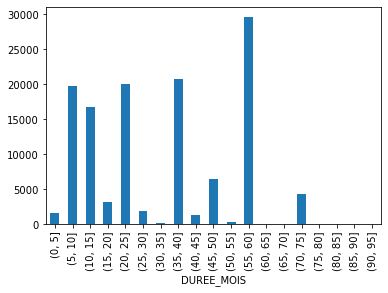

In [152]:
ax = freq_DUREE_MOIS.plot.bar(stacked=False)

In [33]:
freq_NATIONALITE= df['NATIONALITE'].groupby(df.NATIONALITE).count()


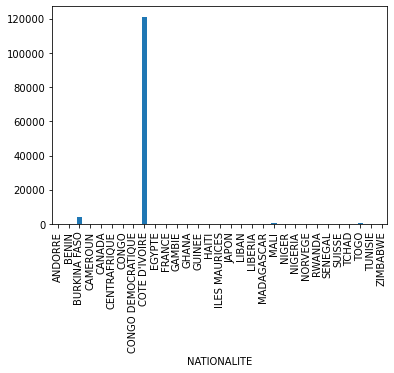

In [95]:
ax = freq_NATIONALITE.plot.bar(stacked=False)

In [34]:
freq_NATIONALITE= df['NATIONALITE'].groupby(df.NATIONALITE).count()

In [35]:
df['AGE']

0         (45, 60]
1         (45, 60]
2         (45, 60]
3         (45, 60]
4         (45, 60]
            ...   
126606    (15, 30]
126607    (30, 45]
126608    (30, 45]
126609    (30, 45]
126610    (45, 60]
Name: AGE, Length: 126611, dtype: category
Categories (6, interval[int64]): [(0, 15] < (15, 30] < (30, 45] < (45, 60] < (60, 75] < (75, 90]]

In [39]:
freq_AGE= df['AGE'].groupby(df.AGE).count()

In [87]:
print(freq_AGE)

Age_Interval
(0, 10]          1
(10, 20]        20
(20, 30]      1325
(30, 40]     29827
(40, 50]     53729
(50, 60]     25628
(60, 70]     14208
(70, 80]      1555
(80, 90]       158
(90, 100]       22
Name: Age_Interval, dtype: int64


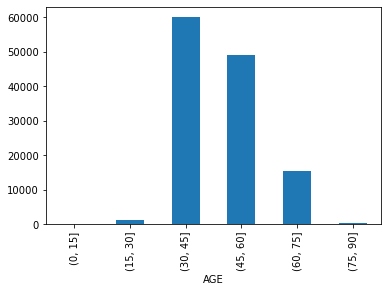

In [40]:
ax = freq_AGE.plot.bar(stacked=False)

In [257]:
df.head()

,DIRECTION,BRANCHE,AGENCE,NOOPER,FONDSDECOMMERCE,CLIENT,TypeCNI,EMPLOYEUR,TYPE_CLIENT,Professsion,SECTEUR_ACTIVITE,Ancienneté,DATOUV,SITUATIONMATRIMONIALE,SEGMENT,AGE,SEXE,NATIONALITE,PAYSRESIDENCE,OPERATEURTELEPHONIQUE,TELEPHONE,SALAIRE,COMMUNE_NAISSANCE,LIEURESIDENCE,INTERDITDECHEQUIER,CATEGORIE,NCG,CPTVUE,NBCREDIT,NBDEBIT,SOLDEMOYEN,TYPEPRÊT,STATUTPRÊT,DATOPER,MNTPRT,INTDIF,PERRMB,MODRMB,TEG,DEBLOCAGE,PREMIER_RMB,DERNRMB,DATFIN,ENCOURS,PERIODICITE,DUREE_MOIS,AUTORISATIONDECOUVERT,NB_ECHEANCE,NB_ECHEANCE_REGLE,ECHEANCE,RACHAT,DECOUVERTS,DEPOT_A_TERME,DEPOTS_DE_GARANTIE,CREANCES_DOUTEUSES,PROVISIONS,DATENAISSANCE.1,CARTE_BANCAIRE,CHEQUIER,INTERNET_BANKING,SMS_BANKING,MOIS01,MOIS02,MOIS03,MOIS04,MOIS05,MOIS06,MOIS07,MOIS08,MOIS09,MOIS10,MOIS11,MOIS12,AGE,NOTE
0,DCPR,SUD EST OUEST,DABOU,3783554,FDC INTER PLUS / DABOU / SEO,20314,Carte nationale d'identite,DRH,PARTICULIERS,RETRAITE,Services non marchands,19,08/09/2003,CELIBATAIRE,INTERMEDIAIRES,"(50.0, 60.0]",M,COTE D'IVOIRE,COTE D'IVOIRE,ORANGE,0707027538,0.0,BOCANDA,NaN,N,PARTICULIERS,251114,203140047,11.0,0.0,566954.181818,CRD CT CONSO. AV. DAT,V,16/06/2010,700000,N,M,P,0.0,16/06/2010,25/08/2010,70000,2011-05-25,0,M,10.0,NaN,10,10,70000,NaN,0,0,0,0,0,16/06/1962,1,1,0,0,0.0,0.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,"(60.0, 70.0]",SAINS
1,DCPR,SUD EST OUEST,DABOU,1001176,FDC INTER PLUS / DABOU / SEO,20314,Carte nationale d'identite,DRH,PARTICULIERS,RETRAITE,Services non marchands,19,08/09/2003,CELIBATAIRE,INTERMEDIAIRES,"(50.0, 60.0]",M,COTE D'IVOIRE,COTE D'IVOIRE,ORANGE,0707027538,0.0,BOCANDA,NaN,N,PARTICULIERS,251114,203140047,NaN,NaN,NaN,CRD CT CONSO. AV. DAT,V,11/10/2003,500000,N,M,P,0.0,31/07/2003,31/08/2003,50000,2004-05-31,0,M,10.0,NaN,10,10,50000,NaN,0,0,0,0,0,16/06/1962,1,1,0,0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,0.0,0.0,0.0,0.0,"(60.0, 70.0]",SAINS
2,DCPR,SUD EST OUEST,DABOU,1513150,FDC INTER PLUS / DABOU / SEO,20314,Carte nationale d'identite,DRH,PARTICULIERS,RETRAITE,Services non marchands,19,08/09/2003,CELIBATAIRE,INTERMEDIAIRES,"(50.0, 60.0]",M,COTE D'IVOIRE,COTE D'IVOIRE,ORANGE,0707027538,0.0,BOCANDA,NaN,N,PARTICULIERS,251114,203140047,4.0,2.0,46226.750000,CRD CT CONSO. AV. DAT,V,07/09/2006,1000000,N,M,P,0.0,31/08/2006,30/09/2006,100000,2007-06-30,0,M,10.0,NaN,10,10,100000,NaN,0,0,0,0,0,16/06/1962,1,1,0,0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,0.0,0.0,"(60.0, 70.0]",SAINS
3,DCPR,SUD EST OUEST,DABOU,1324716,FDC INTER PLUS / DABOU / SEO,20314,Carte nationale d'identite,DRH,PARTICULIERS,RETRAITE,Services non marchands,19,08/09/2003,CELIBATAIRE,INTERMEDIAIRES,"(50.0, 60.0]",M,COTE D'IVOIRE,COTE D'IVOIRE,ORANGE,0707027538,0.0,BOCANDA,NaN,N,PARTICULIERS,251114,203140047,NaN,NaN,NaN,CRD CT CONSO. AV. DAT,V,19/09/2005,1000000,N,M,P,0.0,11/08/2005,30/09/2005,100000,2006-06-30,0,M,10.0,NaN,10,10,100000,NaN,0,0,0,0,0,16/06/1962,1,1,0,0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,0.0,0.0,"(60.0, 70.0]",SAINS
4,DCPR,SUD EST OUEST,DABOU,P360754,FDC INTER PLUS / DABOU / SEO,20314,Carte nationale d'identite,DRH,PARTICULIERS,RETRAITE,Services non marchands,19,08/09/2003,CELIBATAIRE,INTERMEDIAIRES,"(50.0, 60.0]",M,COTE D'IVOIRE,COTE D'IVOIRE,ORANGE,0707027538,0.0,BOCANDA,NaN,N,PARTICULIERS,251114,203140047,10.0,1.0,857501.636364,CRD CT CONSO. AV. DAT,V,23/06/2016,1000000,N,M,P,NaN,23/06/2016,25/08/2016,100000,2017-05-25,0,M,10.0,NaN,10,10,100000,NaN,0,0,0,0,0,16/06/1962,1,1,0,0,0.0,0.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,"(60.0, 70.0]",SAINS


In [98]:
df.describe() 

,CLIENT,Ancienneté,AGE,SALAIRE,NCG,CPTVUE,NBCREDIT,NBDEBIT,SOLDEMOYEN,MNTPRT,TEG,DERNRMB,ENCOURS,AUTORISATIONDECOUVERT,NB_ECHEANCE,NB_ECHEANCE_REGLE,ECHEANCE,DECOUVERTS,DEPOT_A_TERME,DEPOTS_DE_GARANTIE,CREANCES_DOUTEUSES,PROVISIONS,CARTE_BANCAIRE,CHEQUIER,INTERNET_BANKING,SMS_BANKING,MOIS01,MOIS02,MOIS03,MOIS04,MOIS05,MOIS06,MOIS07,MOIS08,MOIS09,MOIS10,MOIS11,MOIS12
count,126611.000000,126611.000000,126475.000000,1.266110e+05,126611.000000,1.266110e+05,126335.000000,126335.000000,1.263350e+05,1.266110e+05,1.242130e+05,1.266110e+05,1.266110e+05,4.285600e+04,126611.000000,126611.000000,1.266110e+05,1.266110e+05,1.266110e+05,126611.000000,1.266110e+05,1.266110e+05,126611.000000,126611.000000,126611.000000,126611.000000,1.265930e+05,1.265930e+05,1.265930e+05,1.265930e+05,1.265930e+05,1.265930e+05,1.265930e+05,1.265930e+05,1.265930e+05,1.265930e+05,1.265930e+05,1.265930e+05
mean,307085.444464,10.296325,47.625713,1.296791e+05,251175.174574,3.071486e+09,15.463767,17.025733,1.032890e+05,2.049553e+06,7.575326e+06,3.135983e+05,-1.644152e+03,1.351811e+05,33.959332,21.701495,-3.199508e+05,-3.314674e+04,8.130694e+04,39.727986,-2.211443e+05,2.106664e+05,0.745615,0.590983,0.638357,0.638357,1.327921e+04,4.346325e+04,5.158348e+04,5.161576e+04,5.163268e+04,5.897572e+04,5.550018e+04,5.336357e+04,5.464843e+04,7.354656e+04,5.219694e+04,8.661586e+04
std,226855.375839,2.785461,9.721551,4.247060e+05,2498.767665,2.269147e+09,14.182265,15.006376,1.435677e+06,5.510851e+06,2.540680e+09,4.502110e+07,1.117837e+05,2.035745e+05,24.493922,18.602015,2.027289e+08,1.221081e+05,2.147575e+06,3377.027359,6.950286e+06,6.938616e+06,0.435517,0.491654,0.480478,0.480478,1.999659e+05,3.654576e+05,4.786687e+05,4.611035e+05,4.621305e+05,1.956900e+06,5.528346e+05,4.674845e+05,4.850522e+05,6.938042e+06,4.317577e+05,9.799600e+06
min,418.000000,1.000000,8.000000,0.000000e+00,202211.000000,4.180016e+06,0.000000,0.000000,-5.424798e+07,0.000000e+00,0.000000e+00,-6.168929e+06,-2.487336e+07,0.000000e+00,0.000000,0.000000,-7.093864e+10,-4.323936e+06,0.000000e+00,0.000000,-2.419696e+09,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,141526.000000,9.000000,41.000000,0.000000e+00,251114.000000,1.415310e+09,5.000000,6.000000,-1.730889e+04,5.000000e+05,1.180676e+01,2.766600e+04,0.000000e+00,5.340250e+04,12.000000,10.000000,2.760400e+04,-2.514050e+04,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.512200e+04,1.816300e+04,1.885300e+04,1.956600e+04,1.994400e+04,2.013900e+04,2.029200e+04,2.045400e+04,2.059400e+04,2.000000e+04,1.428900e+04
50%,265369.000000,10.000000,46.000000,0.000000e+00,251114.000000,2.653710e+09,11.000000,12.000000,1.767708e+04,1.000000e+06,1.343500e+01,4.755400e+04,0.000000e+00,8.200000e+04,24.000000,17.000000,4.748600e+04,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000,1.000000,0.000000e+00,2.680400e+04,3.016000e+04,3.122000e+04,3.209700e+04,3.279600e+04,3.322700e+04,3.345200e+04,3.367800e+04,3.392000e+04,3.289900e+04,2.954100e+04
75%,403726.000000,12.000000,54.000000,1.770000e+05,251116.000000,4.037370e+09,22.000000,25.000000,8.174693e+04,2.500000e+06,1.498372e+01,7.810900e+04,0.000000e+00,1.260000e+05,60.000000,29.000000,7.796700e+04,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000,1.000000,0.000000e+00,4.503700e+04,4.893200e+04,4.938800e+04,5.000000e+04,5.015200e+04,5.062500e+04,5.106600e+04,5.155000e+04,5.205200e+04,5.208200e+04,5.000000e+04
max,970522.000000,19.000000,226.000000,2.910202e+07,352202.000000,1.020488e+10,172.000000,144.000000,3.373296e+08,1.300000e+09,8.942134e+11,9.239544e+09,2.810000e+02,9.000000e+06,506.000000,506.000000,9.239544e+09,0.000000e+00,1.352475e+08,300000.000000,0.000000e+00,2.419696e+09,1.000000,1.000000,1.000000,1.000000,6.844106e+07,1.042978e+08,1.0

In [30]:
list(df.columns)

['DIRECTION',
 'BRANCHE',
 'AGENCE',
 'NOOPER',
 'FONDSDECOMMERCE',
 'CLIENT',
 'TypeCNI',
 'EMPLOYEUR',
 'TYPE_CLIENT',
 'Professsion',
 'SECTEUR_ACTIVITE',
 'Ancienneté',
 'DATOUV',
 'SITUATIONMATRIMONIALE',
 'SEGMENT',
 'AGE',
 'SEXE',
 'NATIONALITE',
 'PAYSRESIDENCE',
 'OPERATEURTELEPHONIQUE',
 'TELEPHONE',
 'SALAIRE',
 'COMMUNE_NAISSANCE',
 'LIEURESIDENCE',
 'INTERDITDECHEQUIER',
 'CATEGORIE',
 'NCG',
 'CPTVUE',
 'NBCREDIT',
 'NBDEBIT',
 'SOLDEMOYEN',
 'TYPEPRÊT',
 'STATUTPRÊT',
 'DATOPER',
 'MNTPRT',
 'INTDIF',
 'PERRMB',
 'MODRMB',
 'TEG',
 'DEBLOCAGE',
 'PREMIER_RMB',
 'DERNRMB',
 'DATFIN',
 'ENCOURS',
 'PERIODICITE',
 'DUREE_MOIS',
 'AUTORISATIONDECOUVERT',
 'NB_ECHEANCE',
 'NB_ECHEANCE_REGLE',
 'ECHEANCE',
 'RACHAT',
 'DECOUVERTS',
 'DEPOT_A_TERME',
 'DEPOTS_DE_GARANTIE',
 'CREANCES_DOUTEUSES',
 'PROVISIONS',
 'DATENAISSANCE.1',
 'CARTE_BANCAIRE',
 'CHEQUIER',
 'INTERNET_BANKING',
 'SMS_BANKING',
 'MOIS01',
 'MOIS02',
 'MOIS03',
 'MOIS04',
 'MOIS05',
 'MOIS06',
 'MOIS07',
 'M

# Test d'indépendance  

### L'hyopthèse H0 est: les deux varibles qualitatives sont indépendantes

#### Test d'indépendance des variables 'NOTE' et 'SECTEUR_ACTIVITE' 

In [50]:
df2=pd.crosstab(df['NOTE'], df['SECTEUR_ACTIVITE'])

In [51]:
df2.head()

SECTEUR_ACTIVITE,"Agriculture,?levage,for?t,chasse et p?che",Assurances et autres services marchands,"Commerce,restaurants et h?tels",Industries manufacturi?res et artisanat,Services non marchands,"Transport,entrep?ts et communications"
NOTE,,,,,,
MALSAINS,12,24,4,2,10896,8
SAINS,60,19,17,1,115531,37


In [52]:
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(df2)

In [53]:
st_chi2, st_p, st_dof

(147.530479298854, 4.4782245439414255e-30, 5)

## Test au seuil de 1% 

### Rejetons l’hypothèse nulle H0 au seuil de 1%, donc pour une pvaleur inférieure à 0.01.
Dans notre cas, la pvaleur obtenue est de 4.4782245439414255e-30 ce qui est largement en dessous du seuil fixé. On peut donc rejeter l’hypothèse nulle. Les variables 'NOTE' et 'SECTEUR_ACTIVITE' ne sont pas indépendantes.

In [18]:
df3=pd.crosstab(df['NOTE'], df['SITUATIONMATRIMONIALE'])
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(df3)

In [19]:
st_chi2, st_p, st_dof

(96.86977165521924, 4.560683023077094e-20, 4)

In [20]:
df3.head()

SITUATIONMATRIMONIALE,CELIBATAIRE,CONCUBINAGE,DIVORCE,MARIE,MARIEE
NOTE,,,,,
MALSAINS,9630,743,21,2,0
SAINS,104276,5945,376,409,1


In [21]:
df4=pd.crosstab(df['NOTE'], df['COMMUNE_NAISSANCE'])
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(df4)


In [20]:
df4.head()

COMMUNE_NAISSANCE,AKRIFOUKRO / M'BAHIAKRO,ABENGOUROU- ANIASSUE,ABIDJAN,AGBOVILLE,ATOUETA / TOGO,BEOUMI,BIANKOUMA,BLODI / DUEKOUE,BOCANDA,BONOUA,BOUAKE,BOUBO /DIVO,BOUNA,DUEKOUE,GAOULOU /SASSANDRA,GRAND MORIE,KOKO KORHOGO,KORHOGO(SAMBOKAHA),LAKOTA,MADJI DJIBROSSO,MAN,MARCORY,ORIE,PETIT BADIEN,SAKASSOU,SOKORO/FERKE,TIEKPE / FERKESSEDOUGOU,TOROGUIHE,TOTOKRO / M'BAHIAKRO,ZAMSE - MANGA,(KOKO)KORHOGO,01011953,0ADIE KOUASSIKRO,2 PLATEAUX,220 LGT ADJAME,220 LGTS ADJAM,220 LGTS ADJAME,220 LOGEMENTS,A PINDIKRO,A RENSEIGNER,A VIEIL AKODJ DABOU,A&BEANOU,A-D-K/BUYO,AAMOROKI,ABACON,ABADJAN KOUTE,ABADJIN DOUME,ABADJIN KOUTE,ABADJIN-DOUME,ABAFFIA/ABOISSO,...,ZOUKOUGBEU / NIME,ZOUKOUGBEU CIV,ZOUKOUGBEU/,ZOUKOUGBEU/DALOA,ZOUKOUKPEU,ZOUKPANGBEU,ZOUKPAUGBEU,ZOULA/REO,ZOULA/REO/SANGUIE,ZOULAIREO,ZOULOU REO SANGUIE,ZOUMA,ZOUMA / PABRE,ZOUMA / TOMA,ZOUMA/TOMA/NAYALA,ZOUMENE,ZOUNA-HOUNIEN,ZOUNDWEOGO,ZOUNGOU,ZOUNGOU/GOGO,ZOUOLO,ZOUPLEU,ZOURA / RISSIAM,ZOURMA,ZOURMA / ZABRE,ZOURMA DE ZABRE,ZOURMA KITA,ZOURMA-KITA,ZOURTEIGA,ZOURTENGA,ZOUTOUO,ZOUZOUA S/P SAIOUA,ZOUZOUSSO,ZOUZOUSSO/BIANKOUMA,ZOZO-OLIZIRIBOUE / LAKOTA,ZRABISEIFA,ZRABISSEFLA,ZRABISSEFLA/GOHITAFLA,ZRABISSEIFLA,ZRABODOUGOU,ZRALUO CIV,ZRIWA / GUIBEROUA,ZRO,ZRO / GUIGLO,ZUENOUFLA,ZUENOULA,ZUENOULA SODESUCRE,ZUENOULE,ZUZUA/ISSIA,ZUZUOKO / FRESCO
NOTE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
MALSAINS,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,2,0,9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,4,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,0,0,0,0,0,63,1,0,0,0
SAINS,3,2,5,2,3,2,2,3,3,0,1,1,2,5,1,1,3,4,1,1,5,1,2,1,1,4,2,0,1,1,1,0,4,1,1,3,5,1,1,127,2,1,1,4,2,2,10,3,2,3,...,2,2,3,2,2,7,0,3,3,2,1,0,1,5,2,1,2,39,0,4,1,2,2,1,3,2,1,1,1,2,1,2,1,2,1,1,1,3,25,0,4,1,11,1,4,625,2,2,1,3


In [21]:
st_chi2, st_p, st_dof

(25813.070206880988, 0.0, 12172)

In [22]:
df4=pd.crosstab(df['NOTE'], df['TYPEPRÊT'])
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(df4)



In [23]:
st_chi2,st_p, st_dof

(753.8130284319396, 5.527389727143466e-146, 21)

In [24]:
df4.head()


TYPEPRÊT,AUTRES CRD CT,AUTRES CRD LT,AUTRES CRD MT,CRD CT CONSO. AV. DAT,CRD CT CONSO. AV. RAPPEL SALAIRE,CRD CT CONSO. PAR,CRD CT CONSO. PER,CRD CT EQUIPEMENT STE,CRD CT REPORT COVID19,CRD CT TRESORERIE AV. FACTURE,CRD LT,CRD LT AUTRES,CRD LT IMMO RESIDENTIEL PAR,CRD LT IMMO RESIDENTIEL PER,CRD LT PARTICULIERS,CRD LT PERSONNEL,CRD MT,CRD MT CONSOMATION PAR,CRD MT CONSOMATION PER,CRD MT EQUIPEMENT STE,CRD MT REPORT COVID19,CRD RESTRUCTURES CT
NOTE,,,,,,,,,,,,,,,,,,,,,,
MALSAINS,24,0,0,293,0,3885,2,73,20,4,0,0,0,0,5,16,0,6098,509,0,16,1
SAINS,109,1,19,2637,7,52403,11,533,180,75,4,3,1,21,10,351,17,56854,2138,3,288,0


In [25]:
df6=pd.crosstab(df['NOTE'], df['PERIODICITE'])
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(df6)

In [26]:
st_chi2, st_p, st_dof

(103.95273481776931, 2.6727014233890523e-23, 2)

In [27]:
df6.head()

PERIODICITE,M,S,T
NOTE,,,
MALSAINS,10413,12,521
SAINS,112091,124,3450


In [28]:
df7=pd.crosstab(df['NOTE'], df['NB_ECHEANCE'])
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(df7)


In [29]:
st_chi2, st_p, st_dof

(1285.9282282411555, 1.9553407873164496e-155, 206)

In [30]:
df7.head()

NB_ECHEANCE,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,189,190,192,193,194,198,206,209,226,228,245,246,248,250,252,253,255,256,257,258,259,261,262,263,264,266,271,274,276,281,282,284,285,288,292,293,303,306,308,313,324,338,353,373,378,393,474,478,505,506
NOTE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
MALSAINS,4,19,31,111,58,22,57,7,60,18,1274,6,825,3,22,29,41,11,137,7,243,10,11,6,1710,4,10,5,6,3,114,3,4,1,3,7,2145,3,5,7,27,0,71,3,3,19,8,0,570,5,...,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
SAINS,12,221,201,477,335,256,533,142,554,158,17158,77,15151,88,202,613,511,90,2191,52,1974,50,68,26,17720,53,69,43,74,24,1440,18,56,28,48,31,17395,25,63,100,198,40,674,26,75,68,33,24,5205,27,...,2,4,2,4,2,4,0,2,2,2,2,2,2,3,4,2,4,2,2,2,8,2,2,2,2,3,2,5,2,3,3,2,3,2,3,6,12,9,3,12,1,6,4,6,12,5,5,0,7,8


In [31]:
df.corr()

,CLIENT,Ancienneté,REVENU,NCG,CPTVUE,NBCREDIT,NBDEBIT,SOLDEMOYEN,MNTPRT,NUMSEQ,TAUX,TEG,TAUX_ASSURANCE,TXDB,DERNRMB,ENCOURS,DUREE_MOIS,AUTORISATIONDECOUVERT,DECOUVERTS,NB_ECHEANCE,NB_ECHEANCE_REGLE,FRAIS_DOSSIER,ECHEANCE,IMPAYEAU30/06/2022,PRETS_ET_AVANCES,DECOUVERTS.1,DEPOT_A_TERME,DEPOTS_DE_GARANTIE,CREANCES_DOUTEUSES,PROVISIONS,CARTE_BANCAIRE,CHEQUIER,INTERNET_BANKING,SMS_BANKING,DAT,MOIS01,MOIS02,MOIS03,MOIS04,MOIS05,MOIS06,MOIS07,MOIS08,MOIS09,MOIS10,MOIS11,MOIS12
CLIENT,1.000000,-0.503571,-0.020033,-0.030670,0.999386,-0.005100,0.092857,-0.016601,0.014941,-0.073527,0.030103,-0.003795,-0.156548,0.033031,-0.006099,0.009820,0.090633,-0.136928,-0.134451,0.012982,-0.051705,0.023420,0.002526,0.005830,-0.008489,0.017863,-0.021750,-0.000960,0.007452,-0.007598,0.037865,-0.088854,0.071568,0.071568,-0.048955,-0.012624,-0.007278,-0.008542,-0.007289,-0.007634,-0.002745,-0.003723,-0.006766,-0.007215,-0.003838,-0.004401,-0.004981
Ancienneté,-0.503571,1.000000,0.058204,0.068257,-0.502619,0.047701,-0.025304,0.034576,0.023380,0.088974,0.004338,0.009109,0.265878,0.008488,0.012512,-0.018561,-0.014345,0.276418,0.263743,0.069184,0.062849,-0.010709,-0.001688,-0.007733,-0.028067,-0.062199,0.053639,0.002336,-0.005826,0.005878,-0.087998,0.143865,-0.126036,-0.126036,0.112329,0.019357,0.009302,0.015835,0.014263,0.015647,-0.002277,0.009364,0.015918,0.015491,0.005725,0.012834,0.012343
REVENU,-0.020033,0.058204,1.000000,-0.001869,-0.020033,0.067487,-0.045784,0.144407,0.342248,0.015450,-0.050762,0.000710,0.075001,-0.047987,0.014330,-0.008289,0.010856,0.628493,0.628148,0.000472,0.001063,0.214562,0.019525,0.000098,-0.286763,-0.147418,0.168938,0.100195,0.002441,-0.007452,0.019729,0.073065,0.039685,0.039685,0.137205,0.147211,0.248166,0.087679,0.091273,0.085599,0.209890,0.176740,0.080391,0.088246,0.090280,0.084162,0.003437
NCG,-0.030670,0.068257,-0.001869,1.000000,-0.022217,-0.015253,-0.025987,0.008095,0.022528,0.007316,-0.057982,-0.000070,0.081637,-0.057238,-0.000008,-0.000371,0.014513,0.400885,0.402394,0.013512,-0.002983,0.000667,0.000077,0.000092,0.008770,0.005489,-0.000796,-0.000231,0.000811,-0.000774,-0.038274,-0.019320,-0.032970,-0.032970,-0.001508,0.007791,0.004375,0.003042,0.003013,0.003027,0.000564,0.002163,0.002543,0.002144,0.000161,0.002192,-0.000002
CPTVUE,0.999386,-0.502619,-0.020033,-0.022217,1.000000,-0.005362,0.092521,-0.016601,0.014894,-0.073536,0.029393,-0.003794,-0.155662,0.032330,-0.006099,0.009760,0.090413,-0.136928,-0.134451,0.012809,-0.051782,0.023420,0.002526,0.005829,-0.008389,0.017933,-0.021755,-0.000963,0.007459,-0.007605,0.037378,-0.089166,0.071179,0.071179,-0.048964,-0.012571,-0.007259,-0.008531,-0.007278,-0.007623,-0.002743,-0.003717,-0.006756,-0.007211,-0.003838,-0.004410,-0.004982
NBCREDIT,-0.005100,0.047701,0.067487,-0.015253,-0.005362,1.000000,-0.036310,0.089766,0.170835,0.088525,0.182006,-0.002192,0.106988,0.179134,-0.002913,-0.009117,0.588804,0.041261,0.040831,0.558956,0.520613,0.085223,-0.000486,-0.002221,-0.091183,0.054976,0.031451,0.010734,0.008283,-0.008227,0.137808,-0.043125,0.159704,0.159704,0.036222,0.000437,-0.007023,-0.002858,-0.002036,-0.001711,-0.002493,-0.003023,0.000744,0.001240,-0.001114,0.005570,-0.002318
NBDEBIT,0.092857,-0.025304,-0.045784,-0.025987,0.092521,-0.036310,1.000000,-0.077680,0.131737,0.094603,0.182213,-0.002287,0.061577,0.175452,-0.004365,-0.003547,0.659847,-0.042834,-0.039968,0.605504,0.235773,0.081124,0.000960,0.004484,-0.084589,-0.110031,-0.028824,-0.006277,-0.003806,0.003460,-0.005757,0.041316,-0.010470,-0.010470,-0.037709,-0.011677,-0.023951,-0.020300,-0.018522,-0.017107,-0.007047,-0.016318,-0.013628,-0.014918,-0.003994,-0.009251,-0.002935
SOLDEMOYEN,-0.016601,0.034576,0.144407,0.008095,-0.016601,0.089766,-0.077680,1.000000,0.077076,0.010497,-0.031938,0.000025,0.035971,-0.031214,0.003700,-0.002264,-0.001109,0.239569,0.238237,0.002035,0.017852,0.040481,-0.003497,-0.000154,-0.046728,0.013652,0.086012,0.033711,0.094308,-0.095038,0.007152,0.025069,0.005157,0.005157,0.061575,0.014313,-0.036850,

In [54]:
df8=pd.crosstab(df['NOTE'], df['AGE'])

In [55]:
df8.head()

AGE,"(0, 15]","(15, 30]","(30, 45]","(45, 60]","(60, 75]","(75, 90]"
NOTE,,,,,,
MALSAINS,2,183,5631,4167,922,33
SAINS,15,1146,54411,44973,14507,461


In [57]:
pd.crosstab(df['NOTE'], df['AGE']).apply(lambda r: r/len(df), axis=1)

AGE,"(0, 15]","(15, 30]","(30, 45]","(45, 60]","(60, 75]","(75, 90]"
NOTE,,,,,,
MALSAINS,0.000016,0.001445,0.044475,0.032912,0.007282,0.000261
SAINS,0.000118,0.009051,0.429749,0.355206,0.114579,0.003641


In [127]:
pd.crosstab(df.NOTE, df.AGE_Class).apply(lambda r: r/r.sum(), axis=0)*100

AGE_Class,"(-0.001, 15.0]","(15.0, 30.0]","(30.0, 45.0]","(45.0, 60.0]","(60.0, 75.0]","(75.0, 90.0]","(90.0, 105.0]"
NOTE,,,,,,,
MALSAINS,11.764706,13.643068,9.405364,8.456286,5.919329,6.653226,0.0
SAINS,88.235294,86.356932,90.594636,91.543714,94.080671,93.346774,100.0


In [58]:
pd.crosstab(df.AGE, df.NOTE, normalize='index')


NOTE,MALSAINS,SAINS
AGE,,
"(0, 15]",0.117647,0.882353
"(15, 30]",0.137698,0.862302
"(30, 45]",0.093784,0.906216
"(45, 60]",0.084799,0.915201
"(60, 75]",0.059758,0.940242
"(75, 90]",0.066802,0.933198


In [131]:
df9=pd.crosstab(df['NOTE'], df['AGE_Class'])
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(df9)

In [132]:
st_chi2, st_p, st_dof

(237.46693294134772, 1.9504827058954135e-48, 6)

In [158]:
dfAGE=df['AGE']

<AxesSubplot:>

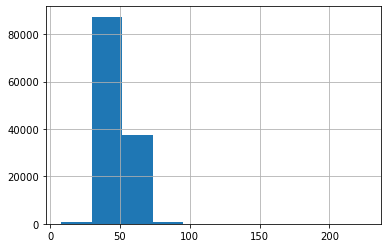

In [159]:
dfAGE.hist()

In [164]:
dfS=df['Ancienneté']

<AxesSubplot:>

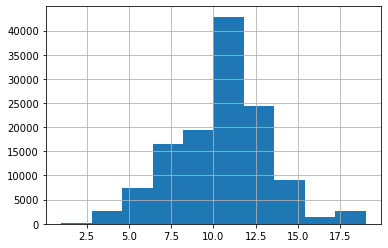

In [165]:
dfS.hist()

In [168]:
dfM=df['MNTPRT']


In [170]:
print(dfM)

0           700000
1           500000
2          1000000
3          1000000
4          1000000
            ...   
126606      600000
126607      580000
126608     1000000
126609      620000
126610    12500000
Name: MNTPRT, Length: 126611, dtype: int64


In [247]:
df['MNTPRT_Interval'] = pd.cut(df['MNTPRT'], bins=np.arange(0,1200000000,2000000))

<ipython-input-247-f63d375b99fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MNTPRT_Interval'] = pd.cut(df['MNTPRT'], bins=np.arange(0,1200000000,2000000))


In [248]:
df.head()

,DIRECTION,BRANCHE,AGENCE,NOOPER,FONDSDECOMMERCE,CLIENT,TypeCNI,EMPLOYEUR,TYPE_CLIENT,Professsion,SECTEUR_ACTIVITE,Ancienneté,DATOUV,SITUATIONMATRIMONIALE,SEGMENT,AGE,SEXE,NATIONALITE,PAYSRESIDENCE,OPERATEURTELEPHONIQUE,TELEPHONE,SALAIRE,COMMUNE_NAISSANCE,LIEURESIDENCE,INTERDITDECHEQUIER,CATEGORIE,NCG,CPTVUE,NBCREDIT,NBDEBIT,SOLDEMOYEN,TYPEPRÊT,STATUTPRÊT,DATOPER,MNTPRT,INTDIF,PERRMB,MODRMB,TEG,DEBLOCAGE,PREMIER_RMB,DERNRMB,DATFIN,ENCOURS,PERIODICITE,DUREE_MOIS,AUTORISATIONDECOUVERT,NB_ECHEANCE,NB_ECHEANCE_REGLE,ECHEANCE,RACHAT,DECOUVERTS,DEPOT_A_TERME,DEPOTS_DE_GARANTIE,CREANCES_DOUTEUSES,PROVISIONS,DATENAISSANCE.1,CARTE_BANCAIRE,CHEQUIER,INTERNET_BANKING,SMS_BANKING,MOIS01,MOIS02,MOIS03,MOIS04,MOIS05,MOIS06,MOIS07,MOIS08,MOIS09,MOIS10,MOIS11,MOIS12,NOTE,Age_Interval,MNTPRT_Interval
0,DCPR,SUD EST OUEST,DABOU,3783554,FDC INTER PLUS / DABOU / SEO,20314,Carte nationale d'identite,DRH,PARTICULIERS,RETRAITE,Services non marchands,19,08/09/2003,CELIBATAIRE,INTERMEDIAIRES,60.0,M,COTE D'IVOIRE,COTE D'IVOIRE,ORANGE,0707027538,0.0,BOCANDA,NaN,N,PARTICULIERS,251114,203140047,11.0,0.0,566954.181818,CRD CT CONSO. AV. DAT,V,16/06/2010,700000,N,M,P,0.0,16/06/2010,25/08/2010,70000,2011-05-25,0,M,"(5, 10]",NaN,10,10,70000,NaN,0,0,0,0,0,16/06/1962,1,1,0,0,0.0,0.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,SAINS,"(50, 60]","(0, 2000000]"
1,DCPR,SUD EST OUEST,DABOU,1001176,FDC INTER PLUS / DABOU / SEO,20314,Carte nationale d'identite,DRH,PARTICULIERS,RETRAITE,Services non marchands,19,08/09/2003,CELIBATAIRE,INTERMEDIAIRES,60.0,M,COTE D'IVOIRE,COTE D'IVOIRE,ORANGE,0707027538,0.0,BOCANDA,NaN,N,PARTICULIERS,251114,203140047,NaN,NaN,NaN,CRD CT CONSO. AV. DAT,V,11/10/2003,500000,N,M,P,0.0,31/07/2003,31/08/2003,50000,2004-05-31,0,M,"(5, 10]",NaN,10,10,50000,NaN,0,0,0,0,0,16/06/1962,1,1,0,0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,0.0,0.0,0.0,0.0,SAINS,"(50, 60]","(0, 2000000]"
2,DCPR,SUD EST OUEST,DABOU,1513150,FDC INTER PLUS / DABOU / SEO,20314,Carte nationale d'identite,DRH,PARTICULIERS,RETRAITE,Services non marchands,19,08/09/2003,CELIBATAIRE,INTERMEDIAIRES,60.0,M,COTE D'IVOIRE,COTE D'IVOIRE,ORANGE,0707027538,0.0,BOCANDA,NaN,N,PARTICULIERS,251114,203140047,4.0,2.0,46226.750000,CRD CT CONSO. AV. DAT,V,07/09/2006,1000000,N,M,P,0.0,31/08/2006,30/09/2006,100000,2007-06-30,0,M,"(5, 10]",NaN,10,10,100000,NaN,0,0,0,0,0,16/06/1962,1,1,0,0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,0.0,0.0,SAINS,"(50, 60]","(0, 2000000]"
3,DCPR,SUD EST OUEST,DABOU,1324716,FDC INTER PLUS / DABOU / SEO,20314,Carte nationale d'identite,DRH,PARTICULIERS,RETRAITE,Services non marchands,19,08/09/2003,CELIBATAIRE,INTERMEDIAIRES,60.0,M,COTE D'IVOIRE,COTE D'IVOIRE,ORANGE,0707027538,0.0,BOCANDA,NaN,N,PARTICULIERS,251114,203140047,NaN,NaN,NaN,CRD CT CONSO. AV. DAT,V,19/09/2005,1000000,N,M,P,0.0,11/08/2005,30/09/2005,100000,2006-06-30,0,M,"(5, 10]",NaN,10,10,100000,NaN,0,0,0,0,0,16/06/1962,1,1,0,0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,0.0,0.0,SAINS,"(50, 60]","(0, 2000000]"
4,DCPR,SUD EST OUEST,DABOU,P360754,FDC INTER PLUS / DABOU / SEO,20314,Carte nationale d'identite,DRH,PARTICULIERS,RETRAITE,Services non marchands,19,08/09/2003,CELIBATAIRE,INTERMEDIAIRES,60.0,M,COTE D'IVOIRE,COTE D'IVOIRE,ORANGE,0707027538,0.0,BOCANDA,NaN,N,PARTICULIERS,251114,203140047,10.0,1.0,857501.636364,CRD CT CONSO. AV. DAT,V,23/06/2016,1000000,N,M,P,NaN,23/06/2016,25/08/2016,100000,2017-05-25,0,M,"(5, 10]",NaN,10,10,100000,NaN,0,0,0,0,0,16/06/1962,1,1,0,0,0.0,0.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,SAINS,"(50, 60]","(0, 2000000]"


In [249]:
freq_MONTANT= df['MNTPRT_Interval'].groupby(df.MNTPRT_Interval).count()

In [250]:
print(freq_MONTANT)

MNTPRT_Interval
(0, 2000000]                88862
(2000000, 4000000]          24029
(4000000, 6000000]           7313
(6000000, 8000000]           2519
(8000000, 10000000]          1473
                            ...  
(1188000000, 1190000000]        0
(1190000000, 1192000000]        0
(1192000000, 1194000000]        0
(1194000000, 1196000000]        0
(1196000000, 1198000000]        0
Name: MNTPRT_Interval, Length: 599, dtype: int64
